In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import itertools
from pybaseball import statcast_pitcher
from pybaseball import playerid_lookup

In [3]:
playerid_lookup('webb', 'logan')

Gathering player lookup table. This may take a moment.


name_last name_first  key_mlbam key_retro key_bbref  key_fangraphs  \
0      webb      logan     657277  webbl001  webblo01          17995   

   mlb_played_first  mlb_played_last  
0            2019.0           2024.0

In [2]:
webbstats = statcast_pitcher("2019-08-17", "2024-06-01", 657277)

Gathering Player Data


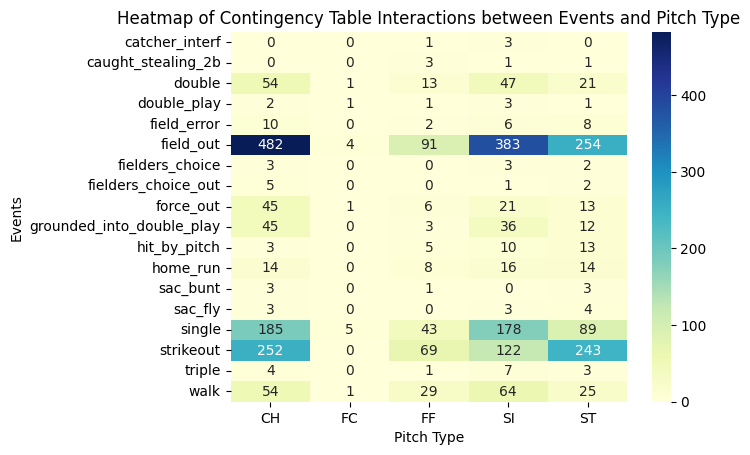

In [3]:
pitch_event = pd.crosstab(webbstats.events, webbstats.pitch_type, margins = False)

sns.heatmap(pitch_event, annot=True, cmap="YlGnBu", fmt='g')

plt.ylabel("Events")
plt.xlabel("Pitch Type")
plt.title("Heatmap of Contingency Table Interactions between Events and Pitch Type")

plt.show()

In [4]:
pitchtype = ['SI', 'CH', 'FF', 'ST', 'FC']

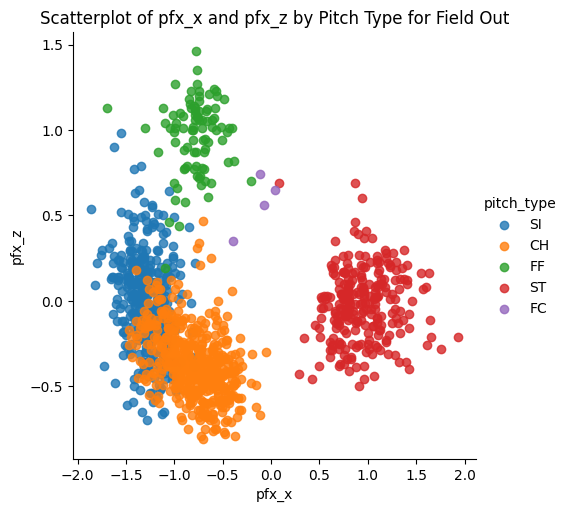

In [8]:
webb_fieldout = webbstats[(webbstats.events == "field_out")]

sns.lmplot(x='pfx_x', y='pfx_z', data=webb_fieldout, hue='pitch_type', fit_reg=False, hue_order = pitchtype)
plt.title("Scatterplot of pfx_x and pfx_z by Pitch Type for Field Out")
plt.show()

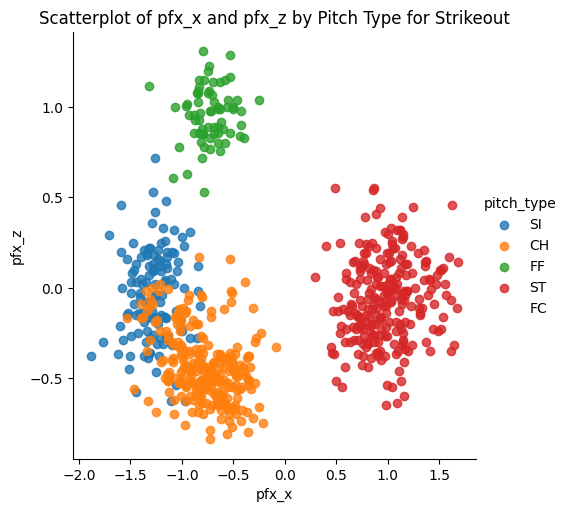

In [9]:
webb_strikeout = webbstats[(webbstats.events == "strikeout")]

sns.lmplot(x='pfx_x', y='pfx_z', data=webb_strikeout, hue='pitch_type', fit_reg=False, hue_order = pitchtype)
plt.title("Scatterplot of pfx_x and pfx_z by Pitch Type for Strikeout")
plt.show()

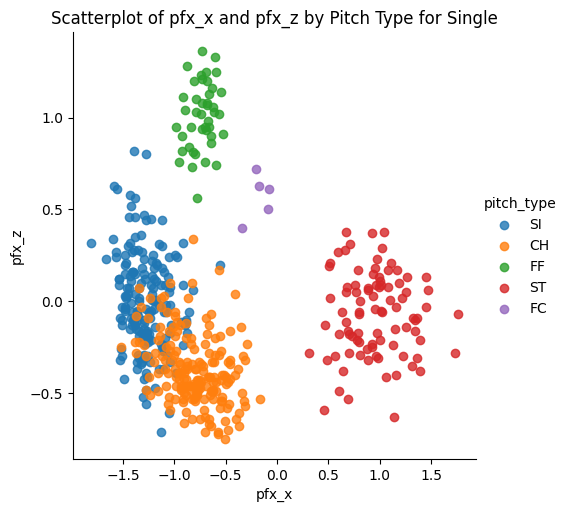

In [10]:
webb_single = webbstats[(webbstats.events == "single")]

sns.lmplot(x='pfx_x', y='pfx_z', data=webb_single, hue='pitch_type', fit_reg=False, hue_order = pitchtype)
plt.title("Scatterplot of pfx_x and pfx_z by Pitch Type for Single")
plt.show()

In [11]:
fig = px.scatter_3d(webb_fieldout, x='pfx_x', y='pfx_z', z='release_spin_rate',
                    color='pitch_type',
                    title = "Scatterplot of pfx_x, pfx_z, and Release Spin Rate by Pitch Type for Fieldout",
                   category_orders={"pitch_type": ['SI', 'CH', 'FF', 'ST', 'FC']})

fig.update_traces(marker_size = 5, opacity = 0.8)
fig.show()

In [12]:
fig = px.scatter_3d(webb_strikeout, x='pfx_x', y='pfx_z', z='release_spin_rate',
                    color='pitch_type',
                    title = "Scatterplot of pfx_x, pfx_z, and Release Spin Rate by Pitch Type for Strikeout",
                   category_orders={"pitch_type": ['SI', 'CH', 'FF', 'ST', 'FC']})

fig.update_traces(marker_size = 5)
fig.show()

In [13]:
fig = px.scatter_3d(webb_single, x='pfx_x', y='pfx_z', z='release_spin_rate',
                    color='pitch_type',
                    title = "Scatterplot of pfx_x, pfx_z, and Release Spin Rate by Pitch Type for Single",
                   category_orders={"pitch_type": ['SI', 'CH', 'FF', 'ST', 'FC']})

fig.update_traces(marker_size = 5)
fig.show()

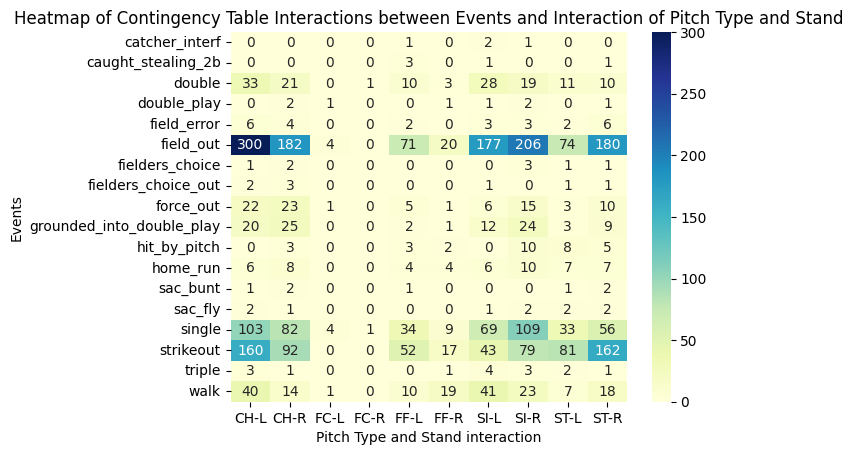

In [17]:
"""
SI: Sinker
CH: Changeup
FF: Four-seam fastball
ST: Sweeper
FC: Cutter
"""

pitch_event_stand = pd.crosstab(webbstats.events, [webbstats.pitch_type, webbstats.stand], margins = False)

sns.heatmap(pitch_event_stand, annot=True, cmap="YlGnBu", fmt='g')

plt.ylabel("Events")
plt.xlabel("Pitch Type and Stand interaction")
plt.title("Heatmap of Contingency Table Interactions between Events and Interaction of Pitch Type and Stand")

plt.show()

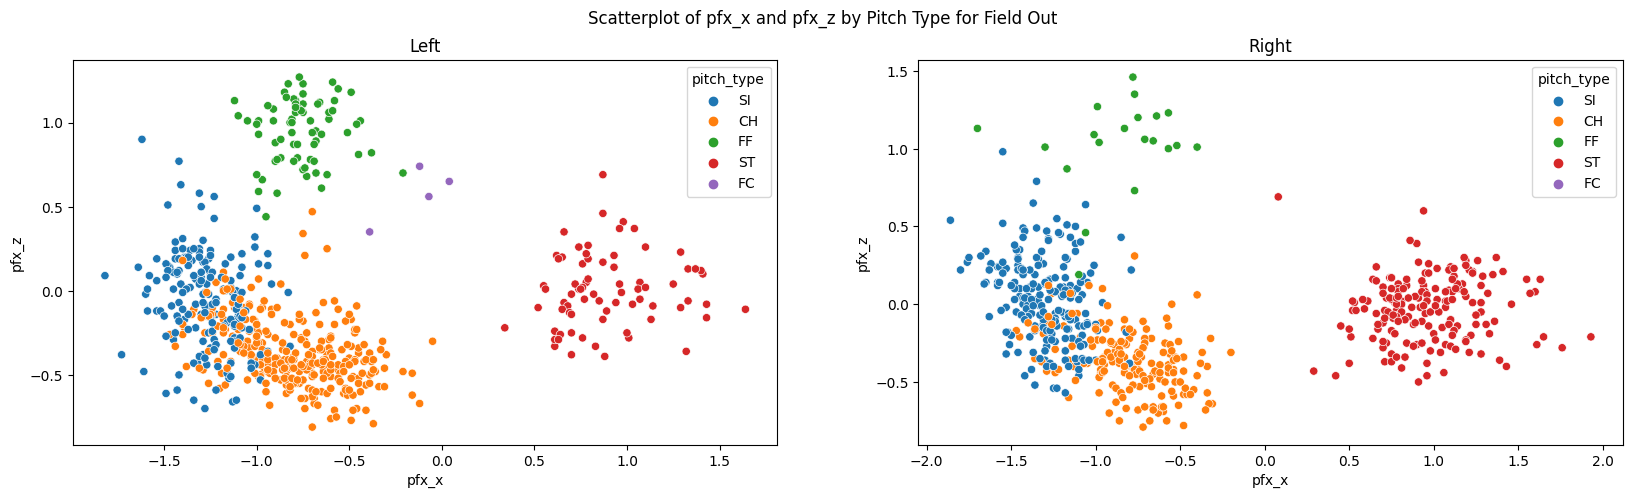

In [27]:
# Stand - Side of the plate batter is standing
webb_fieldout_L = webbstats[(webbstats.events == "field_out") & (webbstats.stand == "L")]
webb_fieldout_R = webbstats[(webbstats.events == "field_out") & (webbstats.stand == "R")]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5), sharey = True)
sns.scatterplot(x='pfx_x', y='pfx_z', data=webb_fieldout_L, hue='pitch_type', hue_order = pitchtype, ax = ax1)
sns.scatterplot(x='pfx_x', y='pfx_z', data=webb_fieldout_R, hue='pitch_type', hue_order = pitchtype, ax = ax2)

ax1.set_title('Left')
ax2.set_title('Right')

fig.suptitle("Scatterplot of pfx_x and pfx_z by Pitch Type for Field Out")

plt.show()

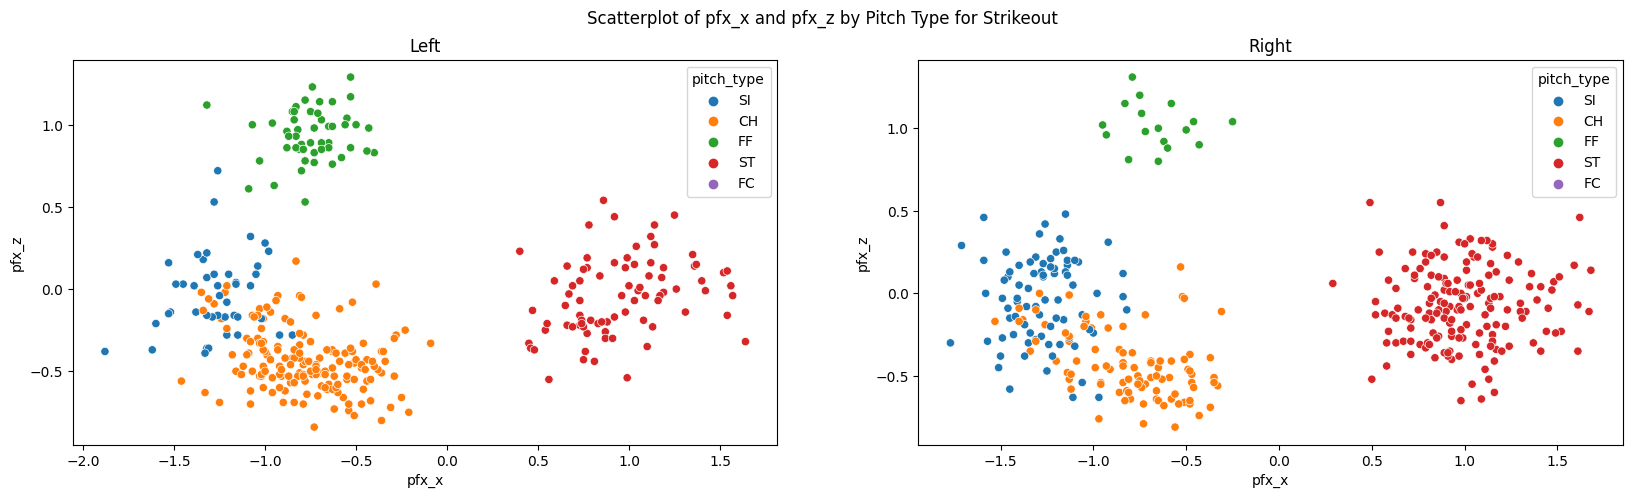

In [28]:
webb_strikeout_L = webbstats[(webbstats.events == "strikeout") & (webbstats.stand == "L")]
webb_strikeout_R = webbstats[(webbstats.events == "strikeout") & (webbstats.stand == "R")]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5), sharey = True)
sns.scatterplot(x='pfx_x', y='pfx_z', data=webb_strikeout_L, hue='pitch_type', hue_order = pitchtype, ax = ax1)
sns.scatterplot(x='pfx_x', y='pfx_z', data=webb_strikeout_R, hue='pitch_type', hue_order = pitchtype, ax = ax2)

ax1.set_title('Left')
ax2.set_title('Right')

fig.suptitle("Scatterplot of pfx_x and pfx_z by Pitch Type for Strikeout")

plt.show()

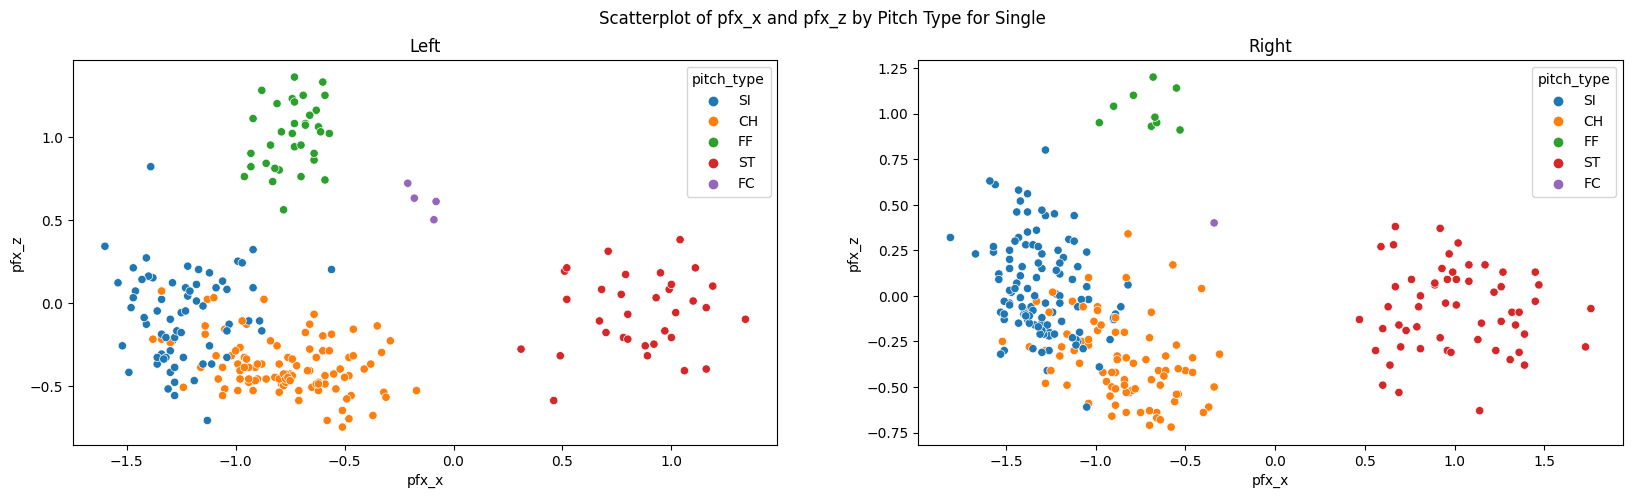

In [29]:
webb_single_L = webbstats[(webbstats.events == "single") & (webbstats.stand == "L")]
webb_single_R = webbstats[(webbstats.events == "single") & (webbstats.stand == "R")]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5), sharey = True)
sns.scatterplot(x='pfx_x', y='pfx_z', data=webb_single_L, hue='pitch_type', hue_order = pitchtype, ax = ax1)
sns.scatterplot(x='pfx_x', y='pfx_z', data=webb_single_R, hue='pitch_type', hue_order = pitchtype, ax = ax2)

ax1.set_title('Left')
ax2.set_title('Right')

fig.suptitle("Scatterplot of pfx_x and pfx_z by Pitch Type for Single")

plt.show()

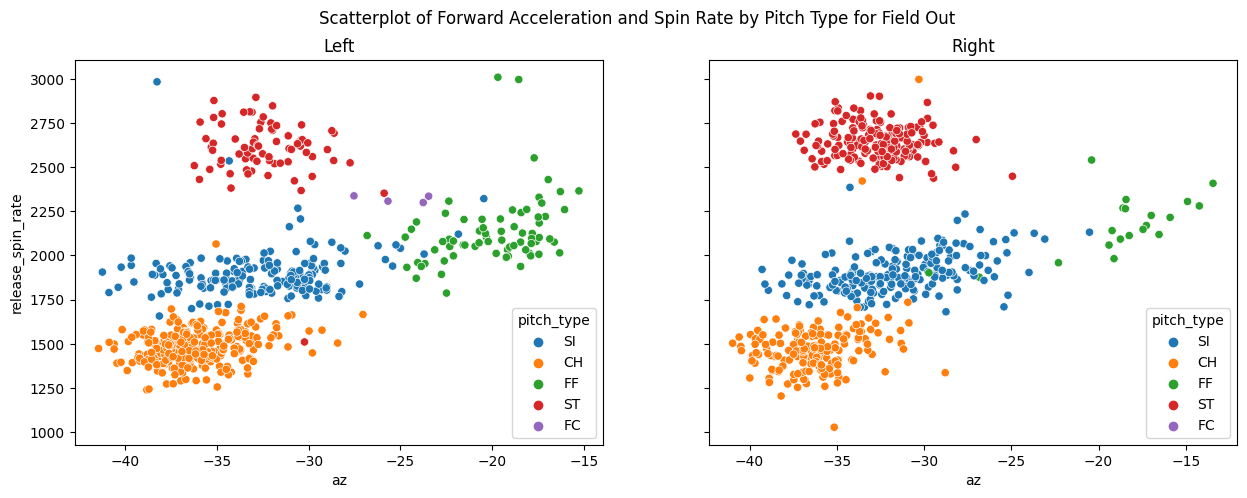

In [42]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5), sharey = True)
sns.scatterplot(x='az', y='release_spin_rate', data=webb_fieldout_L, hue='pitch_type', hue_order = pitchtype, ax = ax1)
sns.scatterplot(x='az', y='release_spin_rate', data=webb_fieldout_R, hue='pitch_type', hue_order = pitchtype, ax = ax2)

ax1.set_title('Left')
ax2.set_title('Right')

fig.suptitle("Scatterplot of Forward Acceleration and Spin Rate by Pitch Type for Field Out")

plt.show()

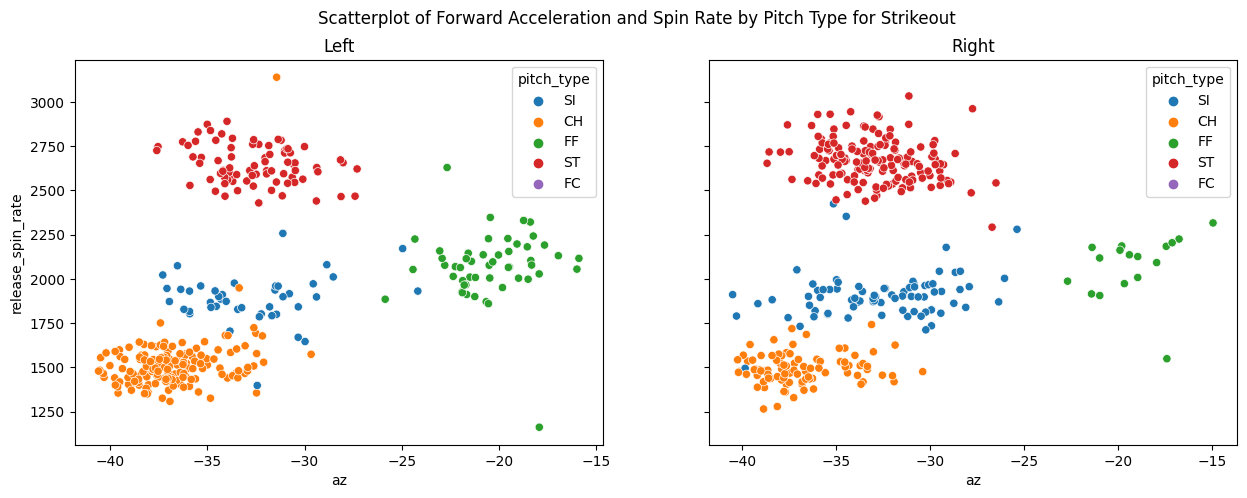

In [41]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5), sharey = True)
sns.scatterplot(x='az', y='release_spin_rate', data=webb_strikeout_L, hue='pitch_type', hue_order = pitchtype, ax = ax1)
sns.scatterplot(x='az', y='release_spin_rate', data=webb_strikeout_R, hue='pitch_type', hue_order = pitchtype, ax = ax2)

ax1.set_title('Left')
ax2.set_title('Right')

fig.suptitle("Scatterplot of Forward Acceleration and Spin Rate by Pitch Type for Strikeout")

plt.show()

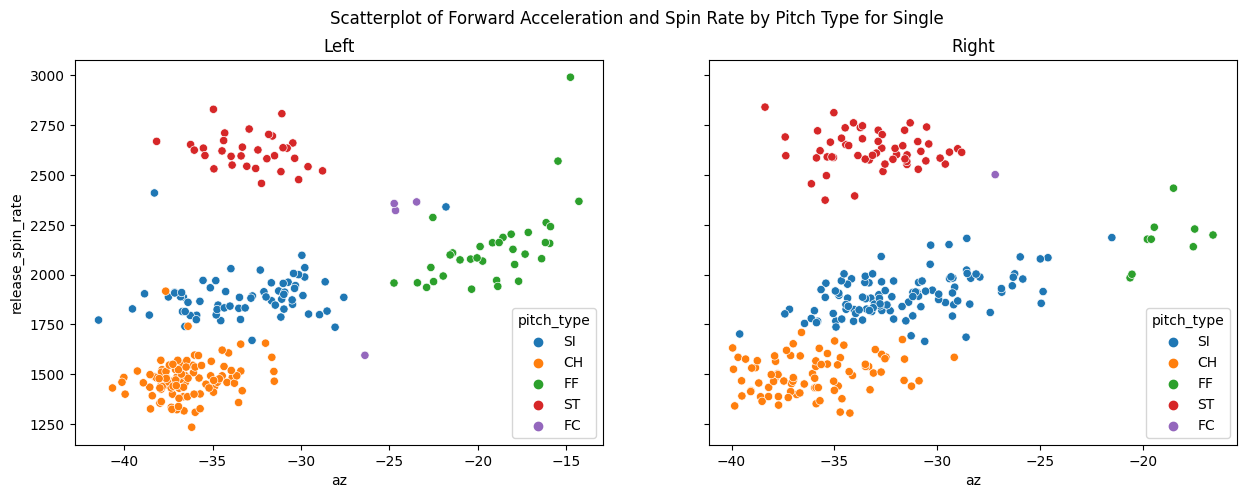

In [40]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5), sharey = True)
sns.scatterplot(x='az', y='release_spin_rate', data=webb_single_L, hue='pitch_type', hue_order = pitchtype, ax = ax1)
sns.scatterplot(x='az', y='release_spin_rate', data=webb_single_R, hue='pitch_type', hue_order = pitchtype, ax = ax2)

ax1.set_title('Left')
ax2.set_title('Right')

fig.suptitle("Scatterplot of Forward Acceleration and Spin Rate by Pitch Type for Single")

plt.show()

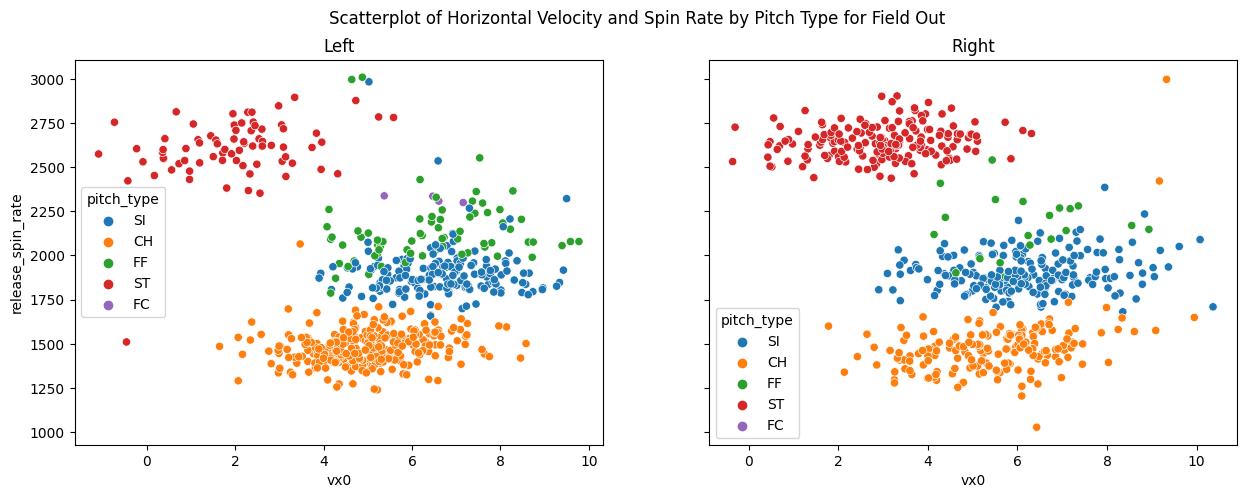

In [43]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5), sharey = True)
sns.scatterplot(x='vx0', y='release_spin_rate', data=webb_fieldout_L, hue='pitch_type', hue_order = pitchtype, ax = ax1)
sns.scatterplot(x='vx0', y='release_spin_rate', data=webb_fieldout_R, hue='pitch_type', hue_order = pitchtype, ax = ax2)

ax1.set_title('Left')
ax2.set_title('Right')

fig.suptitle("Scatterplot of Horizontal Velocity and Spin Rate by Pitch Type for Field Out")

plt.show()

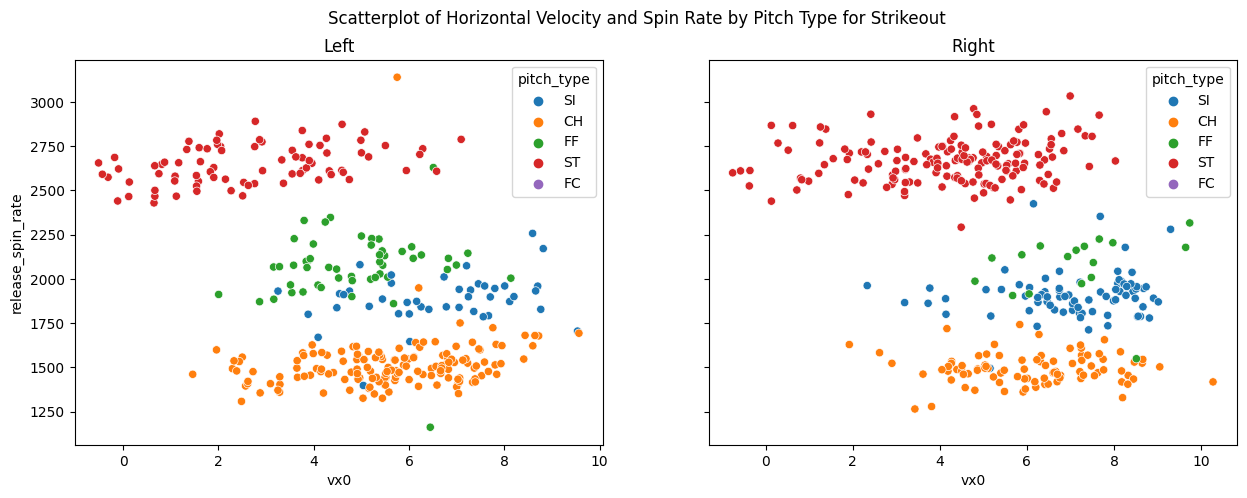

In [44]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5), sharey = True)
sns.scatterplot(x='vx0', y='release_spin_rate', data=webb_strikeout_L, hue='pitch_type', hue_order = pitchtype, ax = ax1)
sns.scatterplot(x='vx0', y='release_spin_rate', data=webb_strikeout_R, hue='pitch_type', hue_order = pitchtype, ax = ax2)

ax1.set_title('Left')
ax2.set_title('Right')

fig.suptitle("Scatterplot of Horizontal Velocity and Spin Rate by Pitch Type for Strikeout")

plt.show()

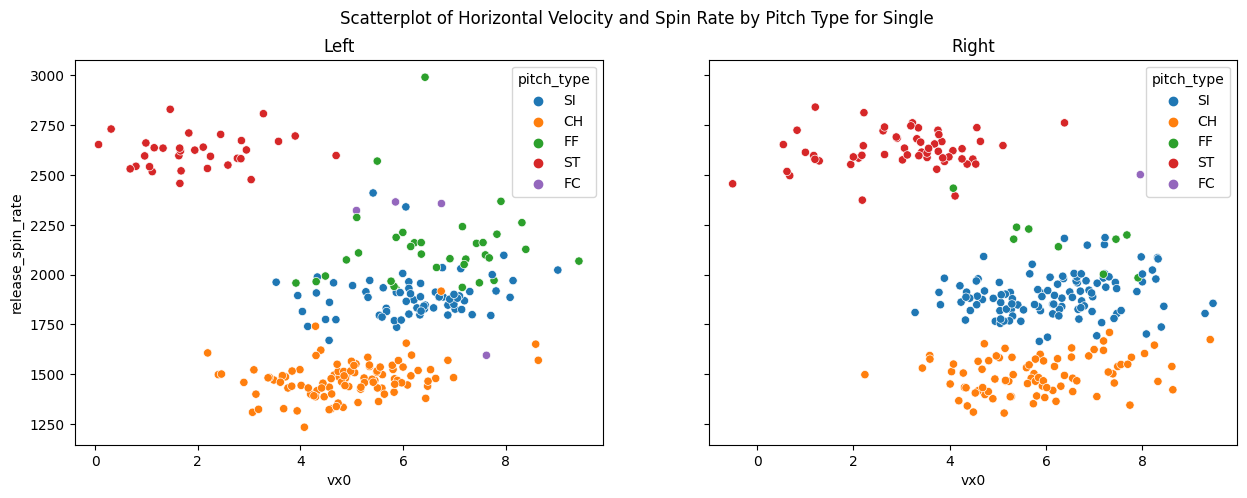

In [45]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5), sharey = True)
sns.scatterplot(x='vx0', y='release_spin_rate', data=webb_single_L, hue='pitch_type', hue_order = pitchtype, ax = ax1)
sns.scatterplot(x='vx0', y='release_spin_rate', data=webb_single_R, hue='pitch_type', hue_order = pitchtype, ax = ax2)

ax1.set_title('Left')
ax2.set_title('Right')

fig.suptitle("Scatterplot of Horizontal Velocity and Spin Rate by Pitch Type for Single")

plt.show()

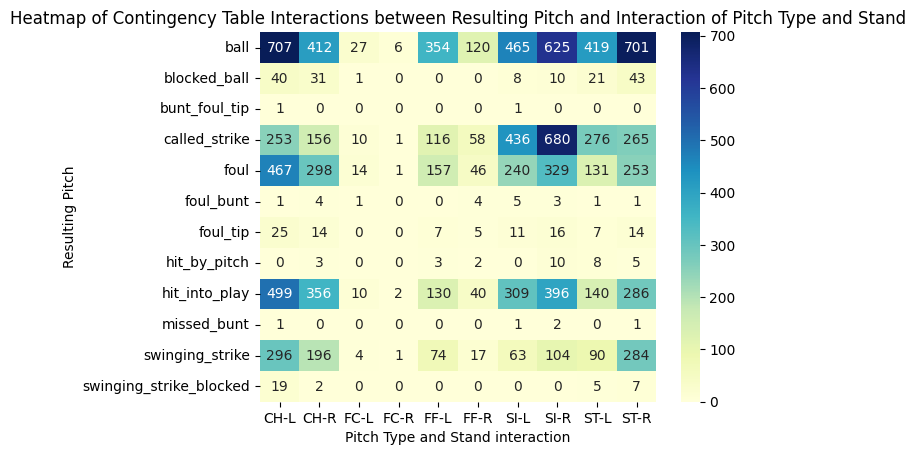

In [46]:
pitch_event_stand = pd.crosstab(webbstats.description, [webbstats.pitch_type, webbstats.stand], margins = False)

sns.heatmap(pitch_event_stand, annot=True, cmap="YlGnBu", fmt='g')

plt.ylabel("Resulting Pitch")
plt.xlabel("Pitch Type and Stand interaction")
plt.title("Heatmap of Contingency Table Interactions between Resulting Pitch and Interaction of Pitch Type and Stand")

plt.show()

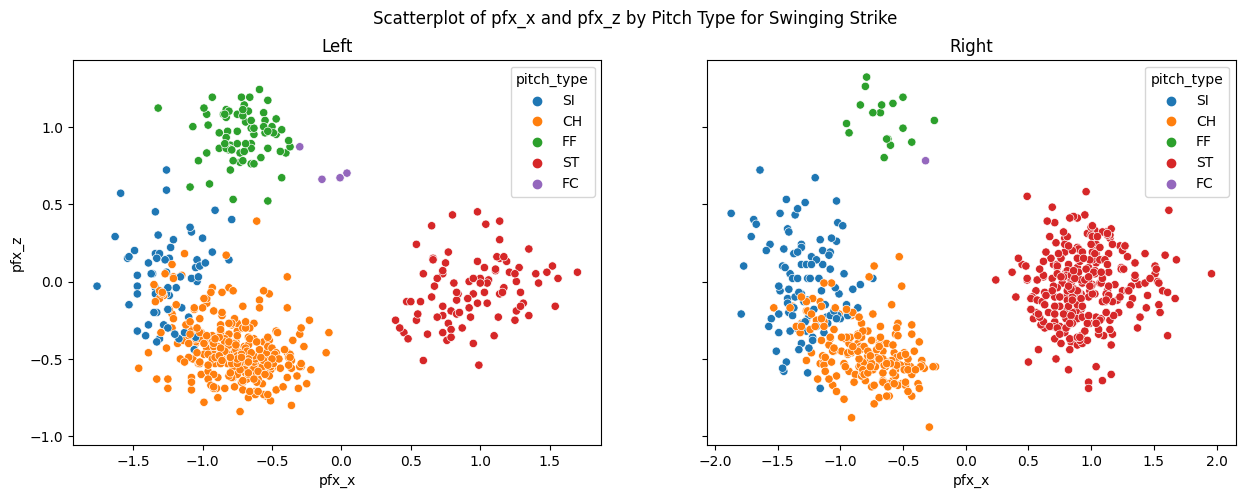

In [50]:
webb_swingingstrike_L = webbstats[(webbstats.description == "swinging_strike") & (webbstats.stand == "L")]
webb_swingingstrike_R = webbstats[(webbstats.description == "swinging_strike") & (webbstats.stand == "R")]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5), sharey = True)
sns.scatterplot(x='pfx_x', y='pfx_z', data=webb_swingingstrike_L, hue='pitch_type', hue_order = pitchtype, ax = ax1)
sns.scatterplot(x='pfx_x', y='pfx_z', data=webb_swingingstrike_R, hue='pitch_type', hue_order = pitchtype, ax = ax2)

ax1.set_title('Left')
ax2.set_title('Right')

fig.suptitle("Scatterplot of pfx_x and pfx_z by Pitch Type for Swinging Strike")

plt.show()

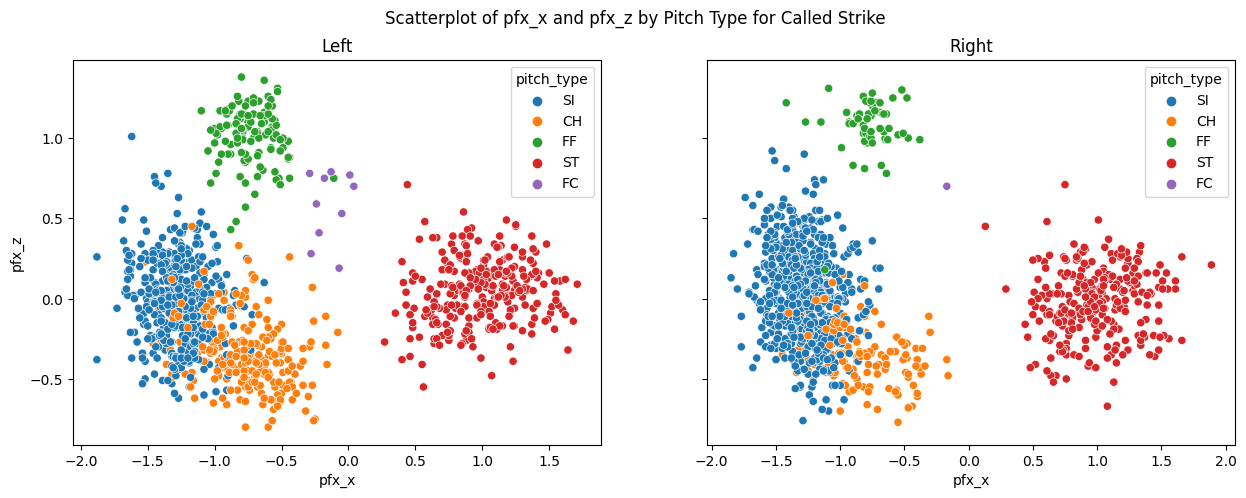

In [54]:
webb_calledstrike_L = webbstats[(webbstats.description == "called_strike") & (webbstats.stand == "L")]
webb_calledstrike_R = webbstats[(webbstats.description == "called_strike") & (webbstats.stand == "R")]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5), sharey = True)
sns.scatterplot(x='pfx_x', y='pfx_z', data=webb_calledstrike_L, hue='pitch_type', hue_order = pitchtype, ax = ax1)
sns.scatterplot(x='pfx_x', y='pfx_z', data=webb_calledstrike_R, hue='pitch_type', hue_order = pitchtype, ax = ax2)

ax1.set_title('Left')
ax2.set_title('Right')

fig.suptitle("Scatterplot of pfx_x and pfx_z by Pitch Type for Called Strike")

plt.show()

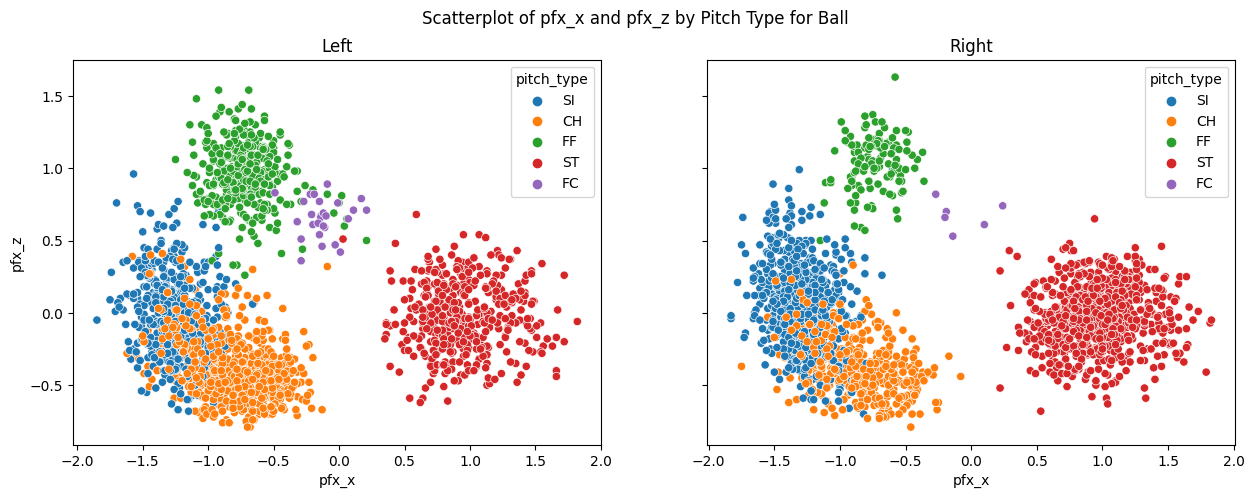

In [53]:
webb_ball_L = webbstats[(webbstats.description == "ball") & (webbstats.stand == "L")]
webb_ball_R = webbstats[(webbstats.description == "ball") & (webbstats.stand == "R")]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5), sharey = True)
sns.scatterplot(x='pfx_x', y='pfx_z', data=webb_ball_L, hue='pitch_type', hue_order = pitchtype, ax = ax1)
sns.scatterplot(x='pfx_x', y='pfx_z', data=webb_ball_R, hue='pitch_type', hue_order = pitchtype, ax = ax2)

ax1.set_title('Left')
ax2.set_title('Right')

fig.suptitle("Scatterplot of pfx_x and pfx_z by Pitch Type for Ball")

plt.show()

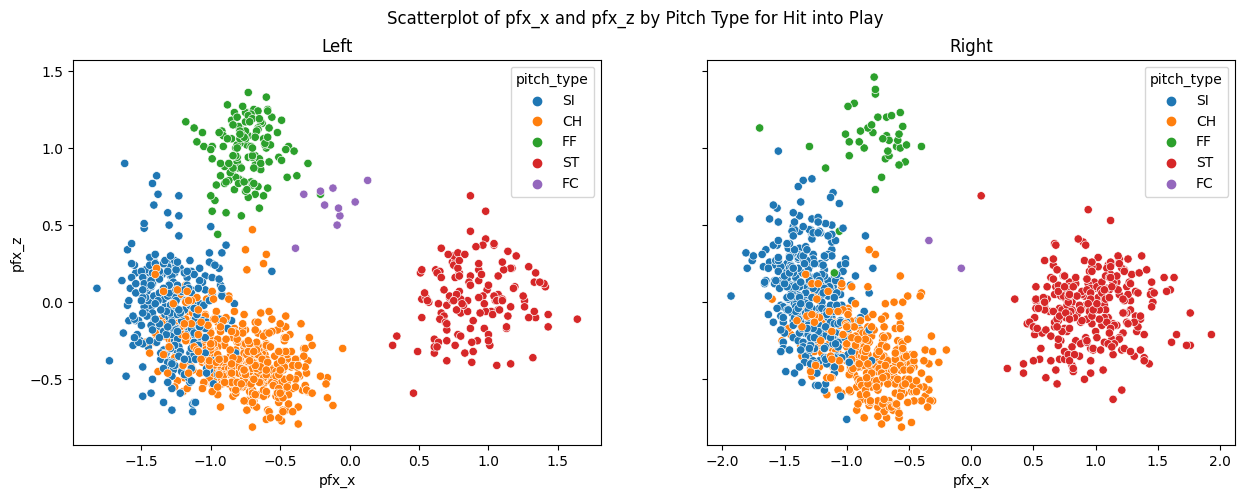

In [55]:
webb_hitplay_L = webbstats[(webbstats.description == "hit_into_play") & (webbstats.stand == "L")]
webb_hitplay_R = webbstats[(webbstats.description == "hit_into_play") & (webbstats.stand == "R")]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5), sharey = True)
sns.scatterplot(x='pfx_x', y='pfx_z', data=webb_hitplay_L, hue='pitch_type', hue_order = pitchtype, ax = ax1)
sns.scatterplot(x='pfx_x', y='pfx_z', data=webb_hitplay_R, hue='pitch_type', hue_order = pitchtype, ax = ax2)

ax1.set_title('Left')
ax2.set_title('Right')

fig.suptitle("Scatterplot of pfx_x and pfx_z by Pitch Type for Hit into Play")

plt.show()